<a href="https://colab.research.google.com/github/AhmedAkram392/CNN-with-mnist-dataSet/blob/master/Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


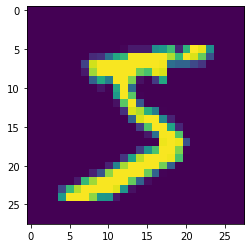

In [3]:
import matplotlib.pyplot as plt

#plot the first image in the dataset
plt.imshow(X_train[0])

In [4]:
#check image shape
X_train[0].shape

(28, 28)

In [0]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [6]:
#Our Target Variables
y_train[0]

5

In [7]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
#Building the model

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
#Compiling the model

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#Training the model

#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 166s 3ms/step - loss: 0.2357 - accuracy: 0.9496 - val_loss: 0.0878 - val_accuracy: 0.9724
Epoch 2/3
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0673 - accuracy: 0.9798 - val_loss: 0.0983 - val_accuracy: 0.9701
Epoch 3/3
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0476 - accuracy: 0.9848 - val_loss: 0.0879 - val_accuracy: 0.9768


In [14]:
# Using our model to make predictions

#predict first 4 images in the test set
model.predict(X_test[:4])

array([[1.4617607e-11, 2.1607161e-16, 3.8040598e-10, 2.9421877e-05,
        2.0939434e-15, 7.5696670e-13, 2.7318984e-18, 9.9997044e-01,
        8.7447737e-11, 6.9740672e-08],
       [1.8296108e-11, 9.5844825e-11, 1.0000000e+00, 5.9153992e-12,
        8.8282737e-15, 6.4933444e-14, 1.7516465e-08, 1.1794657e-16,
        7.3743130e-12, 3.3283320e-18],
       [4.0540705e-08, 9.9981171e-01, 3.6423015e-05, 2.8043509e-08,
        1.2264267e-04, 1.6734833e-06, 8.1125073e-08, 1.4580088e-08,
        2.7385226e-05, 3.1723544e-09],
       [9.9986720e-01, 4.5083139e-11, 4.4988950e-09, 5.8394463e-11,
        1.0382891e-10, 1.3446304e-10, 1.3242499e-04, 2.9724792e-11,
        6.9354904e-08, 2.5184704e-07]], dtype=float32)

In [15]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)